# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants
import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]


# Plot

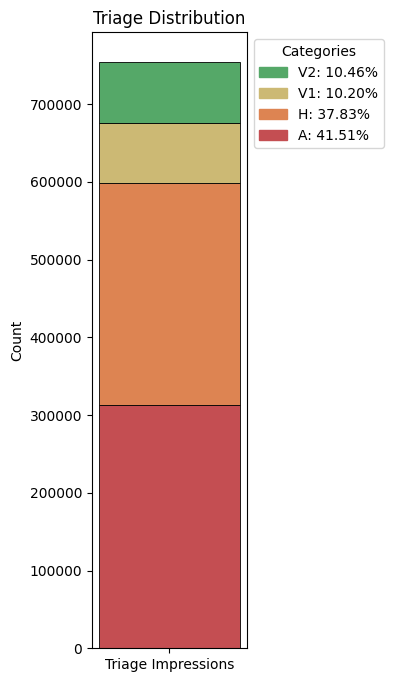

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Sample DataFrame, replace with your actual DataFrame
df = data_loader.processed_incidents_df

# Define categories and get counts
categories = ['A', 'H', 'V1', 'V2']
triage_counts = df['triage_impression_during_call'].value_counts()

# Get Seaborn's deep color palette
deep_palette = sns.color_palette("deep")

# Define custom color palette
custom_deep_palette = {
    'A': deep_palette[3],
    'H': deep_palette[1],
    'V1': deep_palette[8],
    'V2': deep_palette[2]
}

# Initialize variables
bottom = 0
total_count = sum([triage_counts.get(cat, 0) for cat in categories])
legend_labels = []
legend_colors = []

plt.figure(figsize=(2, 8))

# Create the stacked bar chart
for cat in categories:
    count = triage_counts.get(cat, 0)
    percentage = (count / total_count) * 100
    label = f"{cat}: {percentage:.2f}%"
    
    plt.bar('Triage Impressions', count, bottom=bottom, color=custom_deep_palette[cat], edgecolor='black', linewidth=0.6)
    bottom += count
    
    # Store labels and colors for legend
    legend_labels.append(label)
    legend_colors.append(custom_deep_palette[cat])

# Add labels and title
plt.yticks(range(0, bottom+1, 100000))  # Adjust the yticks as needed
plt.ylabel('Count')
plt.title('Triage Distribution')

# Add legend
# Reverse the labels and colors to have 'A' at the bottom and 'V2' at the top in the legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in reversed(legend_colors)], 
           labels=reversed(legend_labels), title='Categories', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


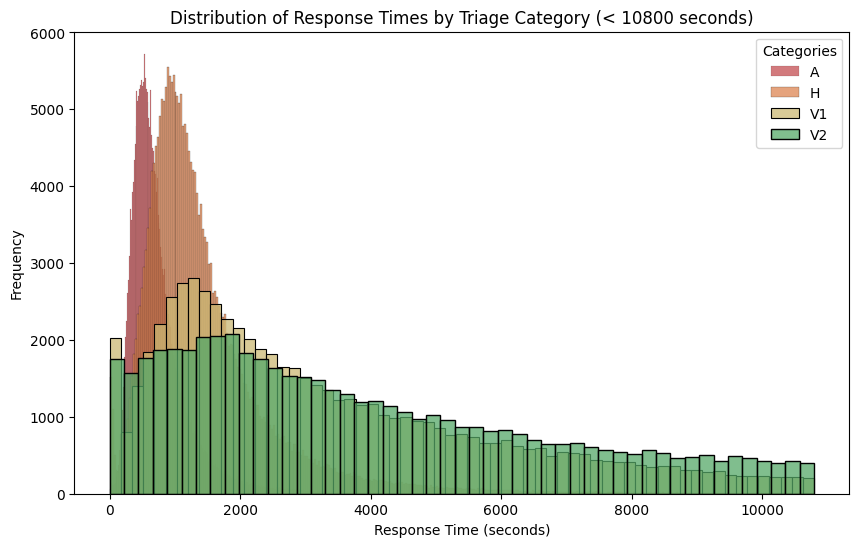

In [5]:
# Initialize figure
plt.figure(figsize=(10, 6))

new_df = df

# Pre-filter data for each category and for response_time_sec < 10800
filtered_data = {cat: new_df[(new_df['triage_impression_during_call'] == cat) & (new_df['response_time_sec'] < 10800) & (new_df['response_time_sec'] > 0)]['response_time_sec'] for cat in categories}

# Plot histogram for each category using the custom color palette
for cat in categories:
    sns.histplot(filtered_data[cat], kde=False, label=cat, color=custom_deep_palette[cat])

# Add labels and title
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times by Triage Category (< 10800 seconds)')
plt.legend(title='Categories')

# Show the plot
plt.show()

In [27]:
missing_time_arrival_scene = new_df[(new_df['response_time_sec'] <= 0) & (new_df['triage_impression_during_call'] == 'A')]
missing_time_arrival_scene.count()

ambulance_disp = new_df[(new_df['time_dispatch'].isna()) & (new_df['response_time_sec'] <= 0)]
ambulance_disp.count()

ambulance_disp = new_df[(new_df['response_time_sec'] <= 0)]

ambulance_disp.count()

id                               7938
synthetic                        7938
triage_impression_during_call    7938
time_call_received               7938
time_call_processed              7938
time_ambulance_notified          7880
time_dispatch                    7893
time_arrival_scene               7938
time_departure_scene             7319
time_arrival_hospital            7272
time_available                   7938
response_time_sec                7938
longitude                        7938
latitude                         7938
easting                          7938
northing                         7938
grid_id                          7938
grid_row                         7938
grid_col                         7938
dtype: int64

C:\Users\torju\AppData\Local\Temp\ipykernel_20728\1782492722.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time_diff_seconds'] = (filtered_df['time_call_received'] - filtered_df['time_call_processed']).dt.total_seconds()


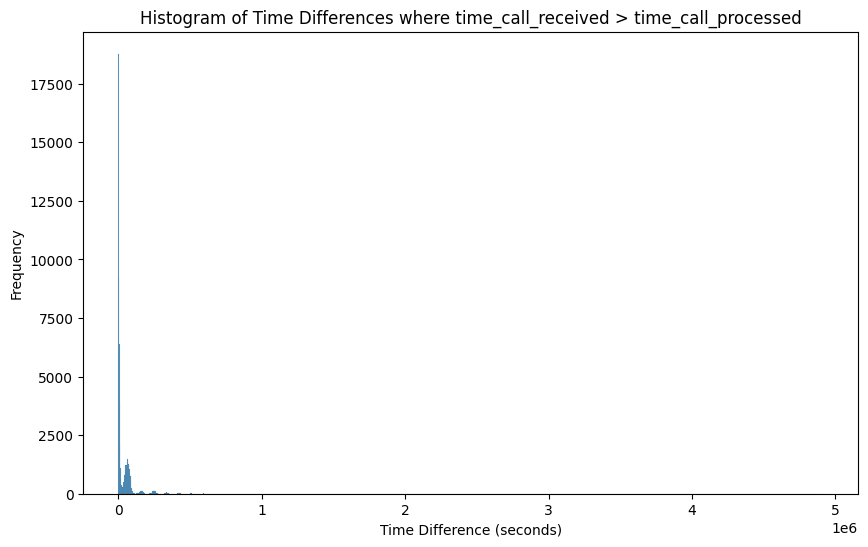

In [40]:

"""# Check for rows where a datetime value comes after another but is actually lower
# Initialize a dictionary to keep count
count_dict = {}

# Loop through columns and compare
for i in range(len(time_columns) - 1):
    col1 = time_columns[i]
    col2 = time_columns[i + 1]
    count = df_filtered[df_filtered[col1] > df_filtered[col2]].shape[0]
    if count > 0:
        count_dict[f"{col1} > {col2}"] = count

count_dict"""
import pandas as pd

test_df = df
"""
# Convert all time columns to datetime format
time_columns = [
    'time_call_received', 'time_call_processed', 'time_ambulance_notified',
    'time_dispatch', 'time_arrival_scene', 'time_departure_scene',
    'time_arrival_hospital', 'time_available'
]
test_df[time_columns] = test_df[time_columns].apply(pd.to_datetime, errors='coerce', format="%Y.%m.%dT%H:%M:%S")

df_filtered = df.drop(test_df[test_df['time_call_received'] < test_df['time_call_processed']].index)
mean_time_diff = (df_filtered['time_call_received'] - df_filtered['time_call_processed']).dt.total_seconds().mean()
mean_time_diff/60
"""
# Filter rows where time_call_received > time_call_processed
filtered_df = test_df[test_df['time_call_received'] > test_df['time_call_processed']]

# Calculate the time difference in seconds
filtered_df['time_diff_seconds'] = (filtered_df['time_call_received'] - filtered_df['time_call_processed']).dt.total_seconds()
filtered_df_greater_than_one_sec = filtered_df[filtered_df['time_diff_seconds'] > 1]


# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_greater_than_one_sec['time_diff_seconds'], kde=False)
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences where time_call_received > time_call_processed')
plt.show()
